In [92]:
import tushare as ts
import pandas as pd
import numpy as np
from pyecharts.globals import CurrentConfig, NotebookType
import pyecharts.options as opts
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
stock_603881_info = ts.get_hist_data('603881',start='2018-01-01',end='2019-12-31')#获取数据港股票涨跌幅等信息

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [47]:
sh_index_info = ts.get_hist_data('sh',start='2018-01-01',end='2019-12-31')#获取上证指数跌幅等信息

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [48]:
def ZscoreNormalization(x):
    """Z-score normaliaztion 即标准化（Z-score)"""
    x = (x - np.mean(x)) / np.std(x)
    return x

In [180]:
stock_603881_price = stock_603881_info["close"] #取数据港股票的收盘价
stock_603881_price_normal = ZscoreNormalization(stock_603881_price) #Z-score标准化
sh_index_price = sh_index_info["close"] #取数据港股票的收盘价
sh_index_price_normal = ZscoreNormalization(sh_index_price) #Z-score标准化

In [53]:
#数据可视化——线图&散点图
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK #jupyter notebook显示结果

In [70]:
#数据可视化——散点图
from pyecharts.charts import Scatter
Scatter = (
    Scatter()
.add_xaxis(xaxis_data=stock_603881_price_normal)
.add_yaxis(
    series_name="数据港股价（标准化）",
    y_axis=sh_index_price_normal,
    symbol_size=4,
    label_opts=opts.LabelOpts(is_show=False),
)
.set_series_opts()
.set_global_opts(
    title_opts=opts.TitleOpts(title="上证指数和数据港收盘价（规范化后）散点图"),
    xaxis_opts=opts.AxisOpts(
        type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
    ),
    yaxis_opts=opts.AxisOpts(
        type_="value",
        axistick_opts=opts.AxisTickOpts(is_show=True),
        splitline_opts=opts.SplitLineOpts(is_show=True),
    ),
    tooltip_opts=opts.TooltipOpts(is_show=False),
)
)
Scatter.render_notebook()

D:\Soft_Download\soft_program\python_conda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 各 Chart 将在 1.9.0 版本开始强制使用 ChartItem 进行数据项配置
  super().__init__(init_opts=init_opts)


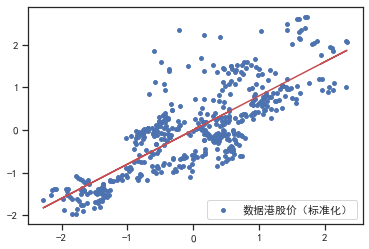

In [98]:
#数据可视化——线图
stock_603881_price_normal= np.array(stock_603881_price_normal.tolist()).reshape(-1,1)
lr = LinearRegression(normalize=True)
lr.fit(stock_603881_price_normal,sh_index_price_normal)
#画布初始设定:
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] =False
#将上证指数和数据港股票用散点形式表现
plt.scatter(stock_603881_price_normal,sh_index_price_normal,s = 15,label = '数据港股价（标准化）')
#将结果用直线画出
plt.plot(stock_603881_price_normal,lr.predict(stock_603881_price_normal),"r-")
#显示说明
plt.legend()

In [103]:
#对数收益率_函数
import math
def ln_stock(x):
        """Rd=ln(s2/ s1)对数收益率"""
        x_list = x.tolist()
        new_list = []
        for i in range(len(x_list)):
            if i == 0 :
                new_item = 0
            else:
                tmp = (x_list[i])/(x_list[i-1])
                new_item = math.log(tmp)
            new_list.append(new_item)
        return new_list

In [112]:
#对数收益率_对比
ln_stock_603881_price = ln_stock(stock_603881_price)
ln_sh_index_price = ln_stock(sh_index_price)

D:\Soft_Download\soft_program\python_conda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


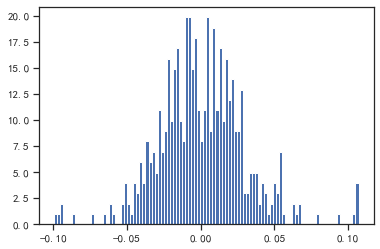

In [131]:
#数据港正态分布图
plt.hist(ln_stock_603881_price, bins=100, normed=True)
plt.show()

D:\Soft_Download\soft_program\python_conda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


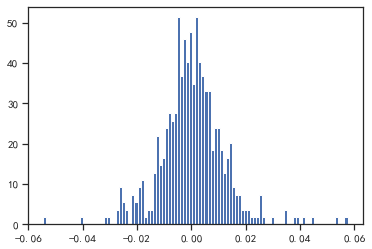

In [132]:
#上证指数正态分布图
plt.hist(ln_sh_index_price, bins=100, normed=True)
plt.show()

In [118]:
#正态性检验---方法1：P值法
from scipy.stats import kstest
print(kstest(ln_stock_603881_price, 'norm')) #p值大于0.05则表示符合正态分布
print(kstest(ln_sh_index_price,'norm')) #p值大于0.05则表示符合正态分布
# KstestResult(statistic=0.4617910306496136, pvalue=1.4142187416242526e-95) P>0.05符合正态分布
# KstestResult(statistic=0.48333148392122344, pvalue=3.0688218572514387e-105) P>0.05符合正态分布

KstestResult(statistic=0.4617910306496136, pvalue=1.4142187416242526e-95)
KstestResult(statistic=0.48333148392122344, pvalue=3.0688218572514387e-105)


In [120]:
#正态性检验---方法2:W检验
from scipy import stats
print(stats.shapiro(ln_stock_603881_price)) #统计量越接近1越表明数据和正态分布拟合的好
print(stats.shapiro(ln_sh_index_price)) #统计量越接近1越表明数据和正态分布拟合的好
#(0.9773707985877991, 7.305965823434235e-07) 统计量接近1，符合正态分布且拟合效果好
#(0.9576665163040161, 1.305267005591304e-10) 统计量接近1，符合正态分布且拟合效果好

(0.9773707985877991, 7.305965823434235e-07)
(0.9576665163040161, 1.305267005591304e-10)


In [188]:
#贝叶斯回归
plt.style.use('seaborn-darkgrid')
# Predictor variable 设置x变量,即数据港标准化后的股价
X1 = stock_603881_price_normal.tolist()
# Simulate outcome variable 设置y变量,即上证指数标准化后的股价
Y = sh_index_price_normal.tolist()

In [189]:
import pymc3 as pm
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters #设置函数的参数
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    # Expected value of outcome 
    mu = alpha + beta[0]*X1
    # Likelihood (sampling distribution) of observations #观察值的可能性
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [190]:
map_estimate = pm.find_MAP(model=basic_model) #输出基本的参数
map_estimate

logp = -451.74, ||grad|| = 0.00083825: 100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 832.96it/s]


{'alpha': array(6.67968718e-15),
 'beta': array([0.80053319, 0.        ]),
 'sigma_log__': array(-0.51239217),
 'sigma': array(0.59906081)}

In [191]:
with basic_model:
    # instantiate sampler 
    step = pm.Slice()
    # draw 300 posterior samples #后验样本数量
    trace = pm.sample(300, step=step)

Only 300 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 3200/3200 [00:05<00:00, 563.04draws/s]


D:\Soft_Download\soft_program\python_conda\lib\site-packages\arviz\data\io_pymc3.py:89: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  PendingDeprecationWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000138C28FEFC8>,
      dtype=object)

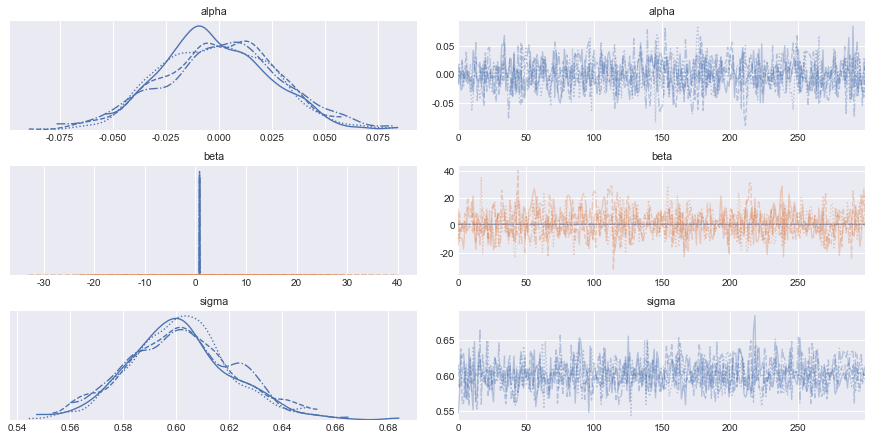

In [192]:
pm.traceplot(trace) #输出后验图

In [193]:
pm.summary(trace).round(2) #输出总结表

D:\Soft_Download\soft_program\python_conda\lib\site-packages\arviz\data\io_pymc3.py:89: PendingDeprecationWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  PendingDeprecationWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-0.00,0.03,-0.05,0.05,0.00,0.00,1229.0,636.0,1229.0,813.0,1.01
beta[0],0.80,0.03,0.75,0.85,0.00,0.00,1203.0,1197.0,1200.0,663.0,1.01
beta[1],1.91,9.90,-16.26,21.13,0.34,0.29,837.0,589.0,853.0,733.0,1.00
sigma,0.60,0.02,0.57,0.64,0.00,0.00,1098.0,1092.0,1105.0,1004.0,1.00


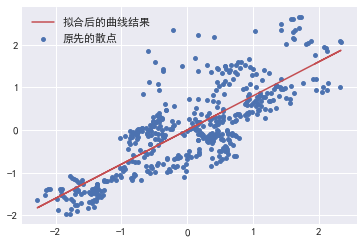

In [227]:
#数据可视化——线图
#画布初始设定:
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] =False
#将上证指数和数据港股票用散点形式表现
plt.scatter(X1,Y,s = 15,label = '原先的散点')
mu = 6.67968718e-15 + 0.80053319 * np.array(X1)
#将结果用直线画出
plt.plot(X1,mu,"r-",label = '拟合后的曲线结果')
#显示说明
plt.legend()